##### INTRODUCTION
        The objective of the study is to analyse the flight booking dataset and to conduct various EDA(Exploratory data anaylysis) processes in order to get meaningful information from it. The various machine learnig algorithms would be used to train the dataset and predict a price of tickets. 'SKYPRICE INSIGHTS' is an internet platform for predicting price of tickets, and hence a platform that potential passengers use to see the future prices of tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers.
        
The aim of our study is to answer the below research questions:

a) Does price vary with Airlines?    
b) How is the price affected when tickets are bought in just 1 or 2 days before departure?    
c) Does ticket price change based on the departure time and arrival time?    
d) How the price changes with change in Source and Destination?    
e) How does the ticket price vary between Economy and Business class?

### DATA DETAILS
Dataset contains information about flight booking options for flight travel between India's top 6 metro cities. There are 300257 datapoints and 21 features in the cleaned dataset.

### IMPORT REQUIRED LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

In [2]:
pd.set_option('display.max_columns', 500)

### IMPORT DATASET

In [3]:
df = pd.read_csv("Final Uncleaned Dataset.csv")
df.head()

/tmp/ipykernel_4939/2243377106.py:1: DtypeWarning: Columns (10,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Final Uncleaned Dataset.csv")


,Index,airline,from,to,class_category,day,month,flight_no,route,dep_hour,arr_hour,dep_period,arr_period,airline_index,route_index,duration_in_min,stops_category,arr_daytime_category,dep_daytime_category,month_category,days_left,price
0,0,SpiceJet,Delhi,Mumbai,Economy,11.0,2.0,SG-8709,Delhi-Mumbai,18.0,21,Afternoon,Night,4,14.0,130.0,Non-stop,Night Arrival,Daytime Departure,February,1.0,5953
1,1,SpiceJet,Delhi,Mumbai,Economy,11.0,2.0,SG-8157,Delhi-Mumbai,6.0,8,Early_morning,Morning,4,14.0,140.0,Non-stop,Daytime Arrival,Daytime Departure,February,1.0,5953
2,2,AirAsia,Delhi,Mumbai,Economy,11.0,2.0,I5-764,Delhi-Mumbai,4.0,6,Early_morning,Early_morning,1,14.0,130.0,Non-stop,Daytime Arrival,Night Departure,February,1.0,5956
3,3,Vistara,Delhi,Mumbai,Economy,11.0,2.0,UK-995,Delhi-Mumbai,10.0,12,Morning,Morning,7,14.0,135.0,Non-stop,Daytime Arrival,Daytime Departure,February,1.0,5955
4,4,Vistara,Delhi,Mumbai,Economy,11.0,2.0,UK-963,Delhi-Mumbai,8.0,11,Morning,Morning,NaN,14.0,140.0,Non-stop,Daytime Arrival,Daytime Departure,February,1.0,5955


### CHECK MISSING VALUES

<Axes: >

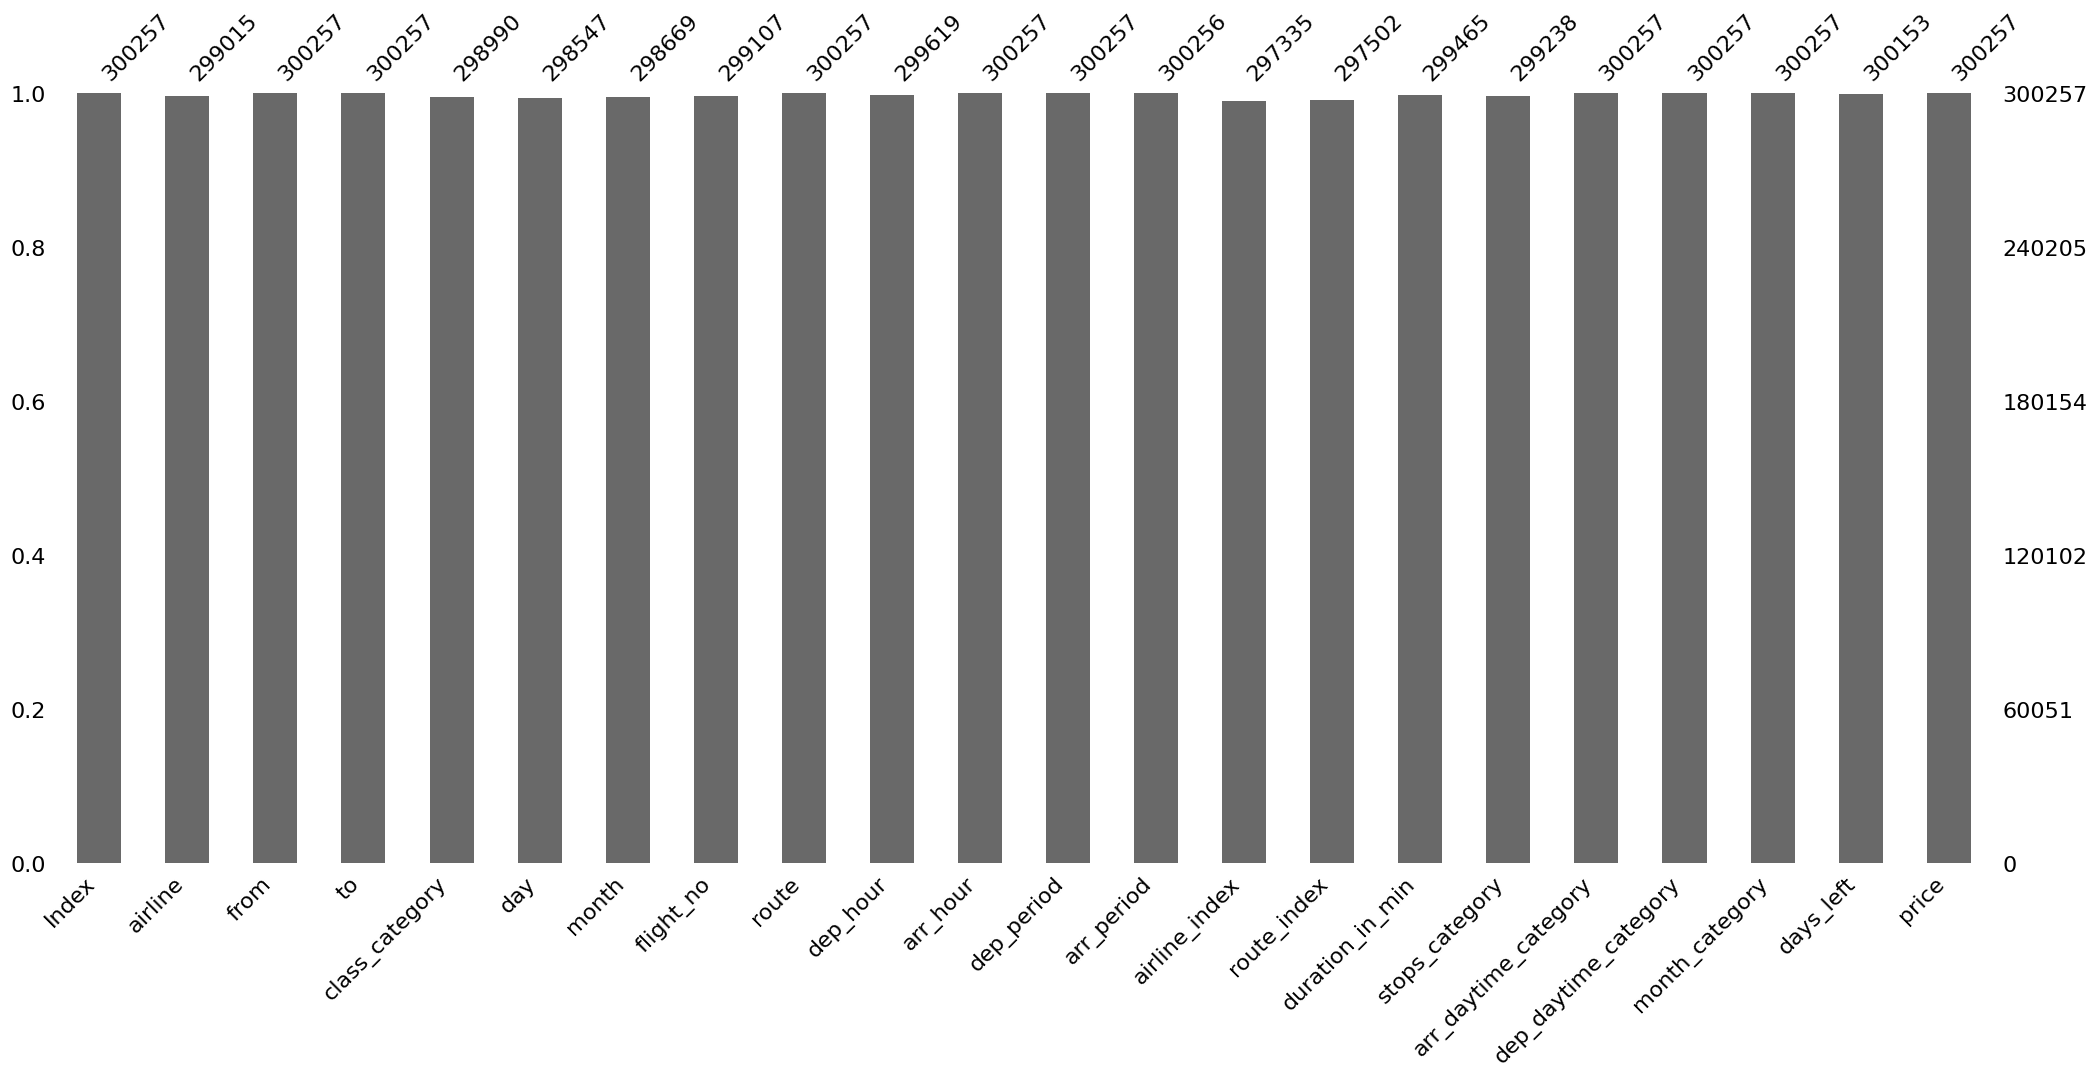

In [4]:
missingno.bar(df)

### Finding the shape of dataset

In [5]:
df.shape

(300257, 22)

### Finding the column names for our dataset

In [6]:
print(df.columns)

Index(['Index', 'airline', 'from', 'to', 'class_category', 'day', 'month',
       'flight_no', 'route', 'dep_hour', 'arr_hour', 'dep_period',
       'arr_period', 'airline_index', 'route_index', 'duration_in_min',
       'stops_category', 'arr_daytime_category', 'dep_daytime_category',
       'month_category', 'days_left', 'price'],
      dtype='object')


### Finding if any null values present in data set

In [7]:
df.isna().sum()

Index                      0
airline                 1242
from                       0
to                         0
class_category          1267
day                     1710
month                   1588
flight_no               1150
route                      0
dep_hour                 638
arr_hour                   0
dep_period                 0
arr_period                 1
airline_index           2922
route_index             2755
duration_in_min          792
stops_category          1019
arr_daytime_category       0
dep_daytime_category       0
month_category             0
days_left                104
price                      0
dtype: int64

### Finding the data types for all the column

In [8]:
df.dtypes

Index                     int64
airline                  object
from                     object
to                       object
class_category           object
day                     float64
month                   float64
flight_no                object
route                    object
dep_hour                float64
arr_hour                 object
dep_period               object
arr_period               object
airline_index            object
route_index             float64
duration_in_min         float64
stops_category           object
arr_daytime_category     object
dep_daytime_category     object
month_category           object
days_left               float64
price                     int64
dtype: object

### Quick Information about the Data


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300257 entries, 0 to 300256
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Index                 300257 non-null  int64  
 1   airline               299015 non-null  object 
 2   from                  300257 non-null  object 
 3   to                    300257 non-null  object 
 4   class_category        298990 non-null  object 
 5   day                   298547 non-null  float64
 6   month                 298669 non-null  float64
 7   flight_no             299107 non-null  object 
 8   route                 300257 non-null  object 
 9   dep_hour              299619 non-null  float64
 10  arr_hour              300257 non-null  object 
 11  dep_period            300257 non-null  object 
 12  arr_period            300256 non-null  object 
 13  airline_index         297335 non-null  object 
 14  route_index           297502 non-null  float64
 15  

### Stastical Description of Data


In [10]:
df.describe()

,Index,day,month,dep_hour,route_index,duration_in_min,days_left,price
count,300257.000000,298547.000000,298669.000000,299619.000000,297502.000000,299465.000000,300153.000000,300257.000000
mean,85749.995864,17.370170,2.664053,12.984066,14.966269,733.273905,26.004751,20883.926526
std,58037.578497,8.064477,0.472321,5.362977,8.830549,431.713330,13.561004,22695.990185
min,0.000000,1.000000,2.000000,0.000000,0.000000,50.000000,1.000000,1105.000000
25%,37532.000000,12.000000,2.000000,8.000000,8.000000,410.000000,15.000000,4783.000000
50%,75064.000000,18.000000,3.000000,12.000000,14.000000,675.000000,26.000000,7425.000000
75%,131708.000000,24.000000,3.000000,18.000000,23.000000,970.000000,38.000000,42521.000000
max,206773.000000,31.000000,3.000000,23.000000,29.000000,2990.000000,49.000000,123071.000000


###  Check duplicated rows in dataset

In [11]:
df.duplicated().sum()

0

### Check unique values for Airline column

In [12]:
df['airline'].nunique()

8

In [13]:
df['airline'].value_counts()

Vistara      127356
Air India     80568
Indigo        42985
GO FIRST      22993
AirAsia       16032
SpiceJet       8979
StarAir          61
Trujet           41
Name: airline, dtype: int64

<Axes: xlabel='airline', ylabel='count'>

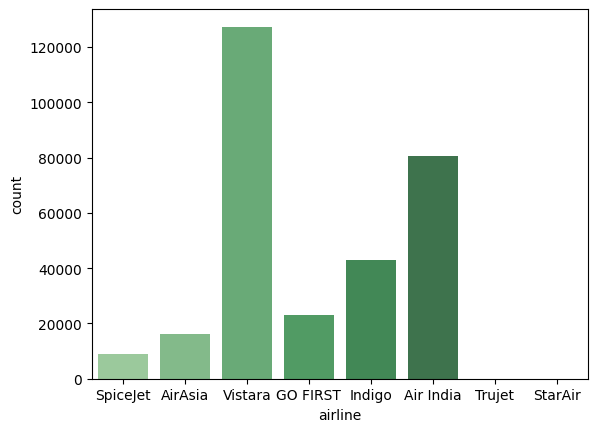

In [14]:
sns.countplot(x='airline',data=df,palette="Greens_d")


### Vistara is a most popular airline and StarAir and Trujet are very less popular.

### Check unique values for Flight Column.

In [15]:
df['flight_no'].nunique()

1569

In [16]:
df['flight_no'].value_counts()

UK-706     3214
UK-772     2719
UK-720     2635
UK-836     2542
UK-822     2468
           ... 
6E-6474       1
6E-3211       1
SG-8339       1
AI-9991       1
SG-8106       1
Name: flight_no, Length: 1569, dtype: int64

### Checking unique values for Source city and Destination city Column.

In [17]:
df['from'].nunique()

6

In [18]:
df['from'].value_counts()

Delhi        61345
Mumbai       60903
Bangalore    52103
Kolkata      46347
Hyderabad    40859
Chennai      38700
Name: from, dtype: int64

In [19]:
df['to'].nunique()

6

In [20]:
df['to'].value_counts()

Mumbai       59108
Delhi        57360
Bangalore    51112
Kolkata      49534
Hyderabad    42775
Chennai      40368
Name: to, dtype: int64

### Checking Unique values for Arrival time and Departure Time column.

In [21]:
df['dep_hour'].nunique()

24

In [22]:
df['dep_hour'].value_counts()

6.0     27084
7.0     24154
10.0    23889
20.0    23695
9.0     22098
17.0    19610
19.0    18059
21.0    17738
8.0     16759
18.0    14995
12.0    13596
16.0    12626
11.0    12305
13.0    12118
15.0    10835
14.0    10236
5.0      8253
22.0     5743
4.0      2417
23.0     2219
2.0       619
0.0       303
3.0       170
1.0        98
Name: dep_hour, dtype: int64

In [23]:
df['arr_hour'].nunique()

49

### Checking unique value for stop column.

In [24]:
df['stops_category'].nunique()

3

In [25]:
df['stops_category'].value_counts()

1-Stop            250025
Non-stop           35947
Multiple-Stops     13266
Name: stops_category, dtype: int64

### Checking Null Values For Airline Column.

In [26]:
df["airline"].isna().sum()

1242

In [27]:
df['airline'].value_counts()

Vistara      127356
Air India     80568
Indigo        42985
GO FIRST      22993
AirAsia       16032
SpiceJet       8979
StarAir          61
Trujet           41
Name: airline, dtype: int64

### Removing rows from dataset having null values in airline column.

In [28]:
df.shape

(300257, 22)

In [29]:
df = df.dropna(subset=['airline'])

### Shape of dataset after removing null values from airline column

In [30]:
df.shape

(299015, 22)

In [31]:
df["airline"].isna().sum()

0

In [32]:
df.sample(5)

,Index,airline,from,to,class_category,day,month,flight_no,route,dep_hour,arr_hour,dep_period,arr_period,airline_index,route_index,duration_in_min,stops_category,arr_daytime_category,dep_daytime_category,month_category,days_left,price
287517,80747,Vistara,Hyderabad,Chennai,Business,27.0,3.0,UK-860,Hyderabad-Chennai,7.0,22,Morning,Night,7.0,16.0,945.0,1-Stop,Night Arrival,Daytime Departure,March,47.0,51707
222034,15264,Vistara,Delhi,Chennai,Business,12.0,2.0,UK-813,Delhi-Chennai,17.0,11,Afternoon,Morning,7.0,11.0,1095.0,Multiple-Stops,Daytime Arrival,Daytime Departure,February,5.0,87694
163254,163258,Indigo,Hyderabad,Mumbai,Economy,16.0,3.0,6E-5207,Hyderabad-Mumbai,8.0,10,Morning,Morning,3.0,19.0,95.0,Non-stop,Daytime Arrival,Daytime Departure,March,34.0,3096
92460,92460,Indigo,Bangalore,Delhi,Economy,24.0,3.0,6E-455,Bangalore-Delhi,7.0,16,Morning,Afternoon,3.0,1.0,540.0,1-Stop,Daytime Arrival,Daytime Departure,March,42.0,4071
81559,81559,Vistara,Mumbai,Chennai,Economy,14.0,3.0,UK-821,Mumbai-Chennai,6.0,8,Early_morning,Morning,7.0,26.0,125.0,Non-stop,Daytime Arrival,Daytime Departure,March,32.0,2900


In [33]:
df1=df.groupby(['flight_no','airline'],as_index=False).count()
df1.airline.value_counts()

Indigo       704
Air India    218
GO FIRST     205
SpiceJet     186
Vistara      133
AirAsia      115
Trujet         4
StarAir        4
Name: airline, dtype: int64

In [34]:
df2=df.groupby(['flight_no','airline','class_category'],as_index=False).count()
df2['class_category'].value_counts()

Economy     1568
Business     295
Name: class_category, dtype: int64

<Axes: xlabel='class_category', ylabel='count'>

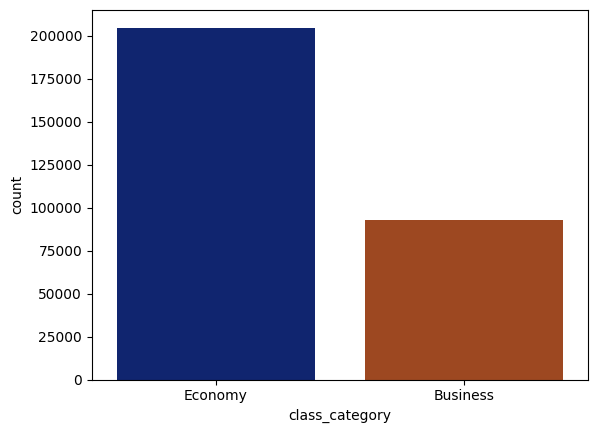

In [35]:
sns.countplot(x='class_category',data=df,palette='dark')


### Most of the Airlines has Economic Class as common



In [36]:
df.head()

,Index,airline,from,to,class_category,day,month,flight_no,route,dep_hour,arr_hour,dep_period,arr_period,airline_index,route_index,duration_in_min,stops_category,arr_daytime_category,dep_daytime_category,month_category,days_left,price
0,0,SpiceJet,Delhi,Mumbai,Economy,11.0,2.0,SG-8709,Delhi-Mumbai,18.0,21,Afternoon,Night,4,14.0,130.0,Non-stop,Night Arrival,Daytime Departure,February,1.0,5953
1,1,SpiceJet,Delhi,Mumbai,Economy,11.0,2.0,SG-8157,Delhi-Mumbai,6.0,8,Early_morning,Morning,4,14.0,140.0,Non-stop,Daytime Arrival,Daytime Departure,February,1.0,5953
2,2,AirAsia,Delhi,Mumbai,Economy,11.0,2.0,I5-764,Delhi-Mumbai,4.0,6,Early_morning,Early_morning,1,14.0,130.0,Non-stop,Daytime Arrival,Night Departure,February,1.0,5956
3,3,Vistara,Delhi,Mumbai,Economy,11.0,2.0,UK-995,Delhi-Mumbai,10.0,12,Morning,Morning,7,14.0,135.0,Non-stop,Daytime Arrival,Daytime Departure,February,1.0,5955
4,4,Vistara,Delhi,Mumbai,Economy,11.0,2.0,UK-963,Delhi-Mumbai,8.0,11,Morning,Morning,NaN,14.0,140.0,Non-stop,Daytime Arrival,Daytime Departure,February,1.0,5955


df.shape

In [37]:
df["flight_no"].isna().sum()

1148

### Dropped flight_no column from dataset.

In [38]:
df = df.drop(['flight_no'], axis = 1)

### Dropped index column from dataset.

In [39]:
df = df.drop(['Index'], axis = 1)

In [40]:
df.shape

(299015, 20)


### Handling null value of class column.

In [41]:
df['class_category'].isna().sum()

1267

In [42]:

df['class_category'].value_counts()

Economy     204716
Business     93032
Name: class_category, dtype: int64

### Replacing null values in column class with economy.

In [43]:
df['class_category'] = df['class_category'].fillna('Economy')

In [44]:
df['class_category'].isna().sum()

0

In [45]:
df.sample(10)

,airline,from,to,class_category,day,month,route,dep_hour,arr_hour,dep_period,arr_period,airline_index,route_index,duration_in_min,stops_category,arr_daytime_category,dep_daytime_category,month_category,days_left,price
98975,Indigo,Bangalore,Mumbai,Economy,11.0,3.0,Bangalore-Mumbai,22.0,6,Night,Early_morning,3.0,4.0,460.0,1-Stop,Daytime Arrival,Night Departure,March,29.0,4554
183929,SpiceJet,Chennai,Delhi,Economy,8.0,3.0,Chennai-Delhi,6.0,23,Early_morning,Night,4.0,6.0,1040.0,1-Stop,Night Arrival,Daytime Departure,March,27.0,4048
22980,Air India,Delhi,Kolkata,Economy,28.0,2.0,Delhi-Kolkata,9.0,19,Morning,Night,0,13.0,600.0,1-Stop,Night Arrival,Daytime Departure,February,18.0,4559
123842,AirAsia,Kolkata,Delhi,Economy,10.0,3.0,Kolkata-Delhi,12.0,21,Morning,Night,1.0,22.0,545.0,Multiple-Stops,Night Arrival,Daytime Departure,March,28.0,3014
9609,AirAsia,Delhi,Mumbai,Economy,30.0,3.0,Delhi-Mumbai,21.0,7,Night,Morning,1,14.0,590.0,1-Stop,Daytime Arrival,Night Departure,March,48.0,2409
187741,Indigo,Chennai,Mumbai,Economy,12.0,2.0,Chennai-Mumbai,13.0,19,Afternoon,Night,3.0,9.0,405.0,1-Stop,Night Arrival,Daytime Departure,February,4.0,23312
66607,Vistara,Mumbai,Kolkata,Economy,12.0,3.0,Mumbai-Kolkata,17.0,19,Afternoon,Night,7.0,29.0,155.0,Non-stop,Night Arrival,Daytime Departure,March,30.0,4762
4457,Indigo,Delhi,Mumbai,Economy,6.0,3.0,Delhi-Mumbai,23.0,1,Night,Early_morning,3,14.0,130.0,Non-stop,Night Arrival,Night Departure,March,24.0,2410
155246,Indigo,Hyderabad,Delhi,Economy,6.0,3.0,Hyderabad-Delhi,5.0,13,Early_morning,Afternoon,3.0,17.0,470.0,1-Stop,Daytime Arrival,Night Departure,March,25.0,6133
31496,Air India,Delhi,Hyderabad,Economy,5.0,3.0,Delhi-Hyderabad,19.0,21,Night,Night,0,12.0,1595.0,1-Stop,Night Arrival,Night Departure,March,23.0,4209


In [46]:
df.isna().sum()

airline                    0
from                       0
to                         0
class_category             0
day                     1706
month                   1588
route                      0
dep_hour                 638
arr_hour                   0
dep_period                 0
arr_period                 1
airline_index           2922
route_index             2751
duration_in_min          792
stops_category          1019
arr_daytime_category       0
dep_daytime_category       0
month_category             0
days_left                104
price                      0
dtype: int64

In [47]:
df.shape

(299015, 20)

### Checking null values of day column.

In [48]:
df["day"].isna().sum()

1706

### Removing rows from dataset having null values in day column.

In [49]:
df.shape

(299015, 20)

In [50]:
df = df.dropna(subset=['day'])

In [51]:
df.shape

(297309, 20)

In [52]:
df["day"].isna().sum()

0

In [53]:
df.isna().sum()

airline                    0
from                       0
to                         0
class_category             0
day                        0
month                    436
route                      0
dep_hour                 638
arr_hour                   0
dep_period                 0
arr_period                 1
airline_index           2920
route_index             2745
duration_in_min          792
stops_category          1019
arr_daytime_category       0
dep_daytime_category       0
month_category             0
days_left                102
price                      0
dtype: int64

### Checking null values in dep_hour

In [54]:
df["dep_hour"].isna().sum()

638

### Removing Rows from dataset where dep_hour is null.

In [55]:
df.shape

(297309, 20)

In [56]:
df = df.dropna(subset=['dep_hour'])

In [57]:
df.shape

(296671, 20)

In [58]:
df.isna().sum()

airline                    0
from                       0
to                         0
class_category             0
day                        0
month                    436
route                      0
dep_hour                   0
arr_hour                   0
dep_period                 0
arr_period                 1
airline_index           2910
route_index             2734
duration_in_min          792
stops_category           921
arr_daytime_category       0
dep_daytime_category       0
month_category             0
days_left                102
price                      0
dtype: int64

### Checking null values of month column


In [59]:
df["month"].isna().sum()

436

### Removing rows from dataset having null values in month column.


In [60]:
df.shape

(296671, 20)

In [61]:
df = df.dropna(subset=['month'])

In [62]:
df.shape

(296235, 20)

In [63]:
df.isna().sum()

airline                    0
from                       0
to                         0
class_category             0
day                        0
month                      0
route                      0
dep_hour                   0
arr_hour                   0
dep_period                 0
arr_period                 1
airline_index           2910
route_index             2730
duration_in_min          792
stops_category           921
arr_daytime_category       0
dep_daytime_category       0
month_category             0
days_left                102
price                      0
dtype: int64

### Checking null values of stops_category column

In [64]:
df["stops_category"].isna().sum()

921

### Removing rows from dataset having null values in stops_category column.


In [65]:
df.shape

(296235, 20)

In [66]:
df['stops_category'].value_counts()

1-Stop            246734
Non-stop           35413
Multiple-Stops     13167
Name: stops_category, dtype: int64

### As in stops_category there are 250025 values of 1-stop which is an 80% of data so we replace it with a 1-stop.

In [67]:
df['stops_category'] = df['stops_category'].fillna('1-Stop')

In [68]:
df["stops_category"].isna().sum()

0

In [69]:
df.isna().sum()

airline                    0
from                       0
to                         0
class_category             0
day                        0
month                      0
route                      0
dep_hour                   0
arr_hour                   0
dep_period                 0
arr_period                 1
airline_index           2910
route_index             2730
duration_in_min          792
stops_category             0
arr_daytime_category       0
dep_daytime_category       0
month_category             0
days_left                102
price                      0
dtype: int64

### Checking null values of duration_in_min column

In [70]:
df["duration_in_min"].isna().sum()

792

### Removing rows from dataset having null values in duration_in_min column.

In [71]:
df.shape

(296235, 20)

In [72]:
df["duration_in_min"].unique

<bound method Series.unique of 0         130.0
1         140.0
2         130.0
3         135.0
4         140.0
          ...  
300252    605.0
300253    625.0
300254    830.0
300255    600.0
300256    605.0
Name: duration_in_min, Length: 296235, dtype: float64>

In [73]:
df['duration_in_min'].value_counts()

130.0     4157
135.0     3932
165.0     2845
125.0     2696
170.0     2296
          ... 
2355.0       1
2310.0       1
2320.0       1
2325.0       1
2490.0       1
Name: duration_in_min, Length: 476, dtype: int64

### There is no use to replace null values in duration_in_min column with mode or mean so we drop that rows which contain null values.

In [74]:
df.shape

(296235, 20)

In [75]:
df["duration_in_min"].isna().sum()

792

In [76]:
df = df.dropna(subset=["duration_in_min"])

In [77]:
df.shape

(295443, 20)

In [78]:
df["duration_in_min"].isna().sum()

0

### Checking null values of days_left column

In [79]:
df["days_left"].isna().sum()

102

### Removing rows from dataset having null values in days_left column.

In [80]:
df.shape

(295443, 20)

In [81]:
df = df.dropna(subset=["days_left"])

In [82]:
df.shape

(295341, 20)

### Airline vs Ticket Price

<Axes: xlabel='airline', ylabel='price'>

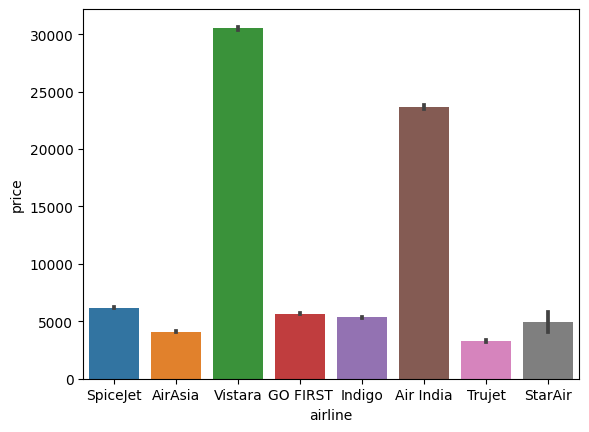

In [83]:
sns.barplot(x=df['airline'],y=df['price'])


### The Vistara airline ticket prices are far more than other airlines¶


### How Does the Ticket Price vary between Economy and Business Class?


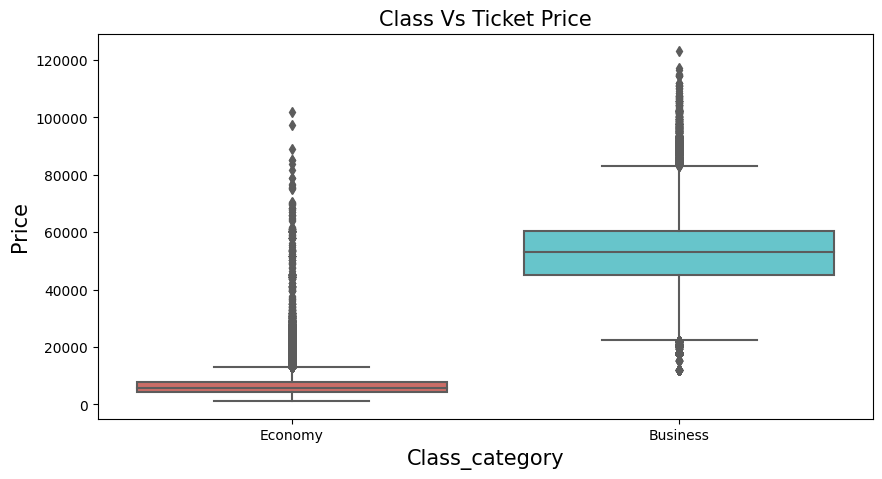

In [84]:
plt.figure(figsize=(10,5))
sns.boxplot(x='class_category',y='price',data=df,palette='hls')
plt.title('Class Vs Ticket Price',fontsize=15)
plt.xlabel('Class_category',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

### Ticket Price is Maximum for Bussiness Class When compared to Economy Class

### How Does the Ticket Price vary with the number of stops of a Flight?

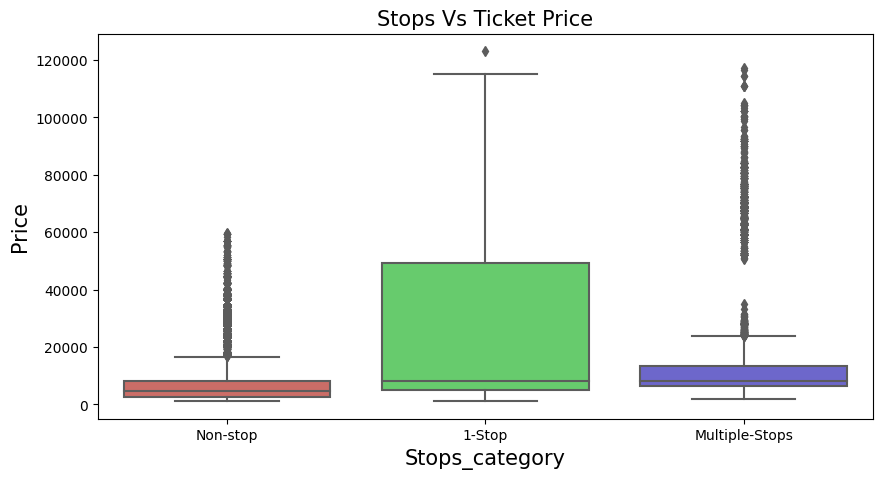

In [85]:
plt.figure(figsize=(10,5))
sns.boxplot(x='stops_category',y='price',data=df,palette='hls')
plt.title('Stops Vs Ticket Price',fontsize=15)
plt.xlabel('Stops_category',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

### How the Ticket Price change based on the Departure Time ?
1. Departure Time Vs Ticket Price

Text(0, 0.5, 'Price')

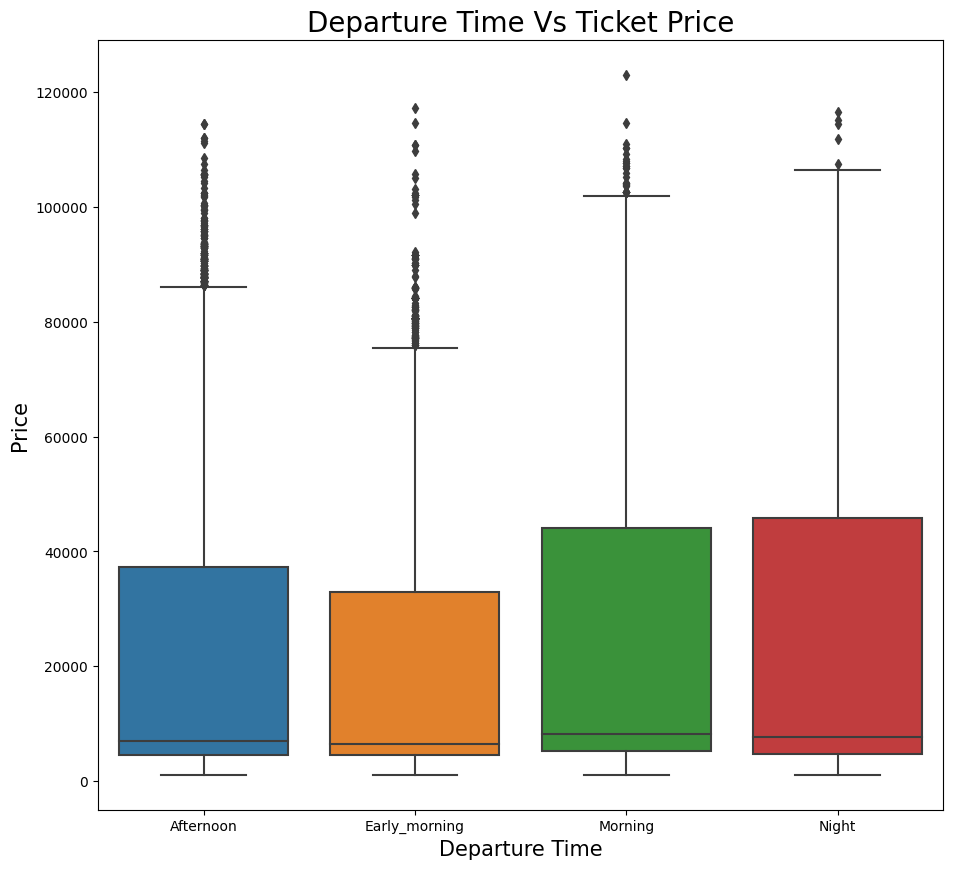

In [86]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='dep_period',y='price',data=df)
plt.title('Departure Time Vs Ticket Price',fontsize=20)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)

### Ticket Price is More for the Flights when the Departure Time is at Night

### Checking Null Values in Departure Time column. 

In [87]:
df["dep_period"].isna().sum()

0

In [88]:
df['dep_period'].value_counts()

Morning          111171
Afternoon         79346
Night             66445
Early_morning     38379
Name: dep_period, dtype: int64

### How the Ticket Price change based on the  Arrival Time?
    2. Arrival Time Vs Ticket Price


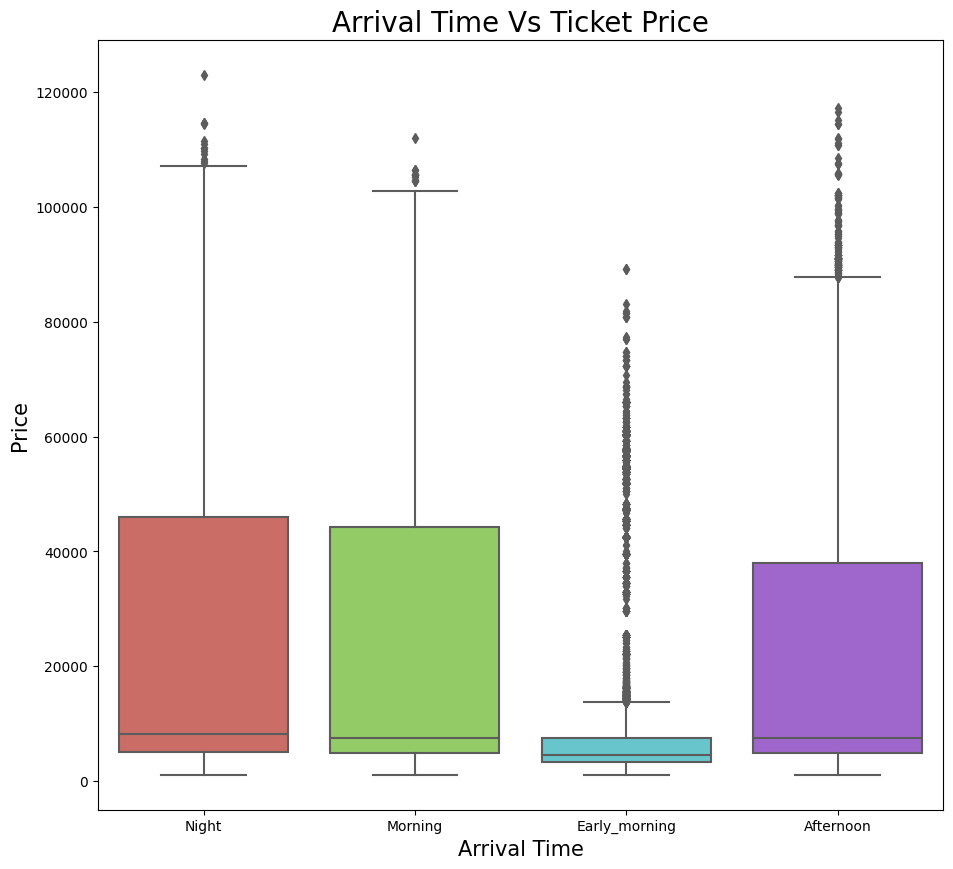

In [89]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='arr_period',y='price',data=df,palette='hls')
plt.title('Arrival Time Vs Ticket Price',fontsize=20)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

### Ticket Price is More for the Flights when the Arrival Time is at Night.


In [90]:
df = df.dropna(subset=["arr_period"])

In [91]:
df = df.dropna(subset=["airline_index"])

In [92]:
df = df.dropna(subset=["route_index"])

In [93]:
df

,airline,from,to,class_category,day,month,route,dep_hour,arr_hour,dep_period,arr_period,airline_index,route_index,duration_in_min,stops_category,arr_daytime_category,dep_daytime_category,month_category,days_left,price
0,SpiceJet,Delhi,Mumbai,Economy,11.0,2.0,Delhi-Mumbai,18.0,21,Afternoon,Night,4,14.0,130.0,Non-stop,Night Arrival,Daytime Departure,February,1.0,5953
1,SpiceJet,Delhi,Mumbai,Economy,11.0,2.0,Delhi-Mumbai,6.0,8,Early_morning,Morning,4,14.0,140.0,Non-stop,Daytime Arrival,Daytime Departure,February,1.0,5953
2,AirAsia,Delhi,Mumbai,Economy,11.0,2.0,Delhi-Mumbai,4.0,6,Early_morning,Early_morning,1,14.0,130.0,Non-stop,Daytime Arrival,Night Departure,February,1.0,5956
3,Vistara,Delhi,Mumbai,Economy,11.0,2.0,Delhi-Mumbai,10.0,12,Morning,Morning,7,14.0,135.0,Non-stop,Daytime Arrival,Daytime Departure,February,1.0,5955
5,Vistara,Delhi,Mumbai,Economy,11.0,2.0,Delhi-Mumbai,11.0,14,Morning,Afternoon,7,14.0,140.0,Non-stop,Daytime Arrival,Daytime Departure,February,1.0,5955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Hyderabad,Business,29.0,3.0,Chennai-Hyderabad,21.0,9,Night,Morning,7,7.0,740.0,1-Stop,Daytime Arrival,Night Departure,March,49.0,51457
300149,Vistara,Chennai,Hyderabad,Business,29.0,3.0,Chennai-Hyderabad,7.0,19,Morning,Night,7,7.0,765.0,1-Stop,Night Arrival,Daytime Departure,March,49.0,51457
300150,Vistara,Chennai,Hyderabad,Business,29.0,3.0,Chennai-Hyderabad,21.0,12,Night,Morning,7,7.0,930.0,1-Stop,Daytime Arrival,Night Departure,March,49.0,51457
300151,Vistara,Chennai,Hyderabad,Business,29.0,3.0,Chennai-Hyderabad,7.0,22,Morning,Night,7,7.0,950.0,1-Stop,Night Arrival,Daytime Departure,March,49.0,51457


### Airline vs SRC-DEST vs Price vs Duration

#### Let's compare the our Airlines with the basis of source, destination, total hours flight and price.



In [94]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
df[['airline','from','to','duration_in_min','price']].groupby(['from','to','airline']).sum()


duration_in_min      price
from      to        airline                              
Bangalore Chennai   Air India        1560970.0   41938825
                    AirAsia             7925.0     268447
                    GO FIRST          212900.0    1842745
                    Indigo             15410.0     610318
                    SpiceJet            3705.0     149966
                    Vistara          3438630.0   98804575
          Delhi     Air India        2005420.0   53865560
                    AirAsia           731455.0    7208158
                    GO FIRST          629585.0    7764259
                    Indigo            692845.0   11891422
                    SpiceJet          566450.0    4915180
                    Vistara          3261585.0  155641769
          Hyderabad Air India        2258980.0   51364239
                    AirAsia            41565.0     555798
                    GO FIRST          262710.0    2257816
                    Indigo            386220.0    4071081
                    SpiceJet            1890.0     130140
                    StarAir             7300.0     237325
                    Trujet               290.0       6578
                    Vistara          4477380.0  127864774
          Kolkata   Air India        2034690.0   58737372
                    AirAsia           379185.0    3695796
                    GO FIRST          550925.0    5007000
                    Indigo            666020.0    9827496
                    SpiceJet          145430.0    1439503
                    Vistara          4041540.0  155871907
          Mumbai    Air India        3021235.0   90270520
                    AirAsia           293995.0    1999221
                    GO FIRST          744220.0    7020423
                    Indigo            547905.0    9314400
                    SpiceJet          116120.0     907175
                    Vistara          3457295.0  185826137
Chennai   Bangalore Air India        1641385.0   47973121
                    AirAsia             9605.0     257511
                    GO FIRST          207115.0    2119418
                    Indigo             54375.0     900463
                    SpiceJet            3920.0     113281
                    Vistara          3297580.0  108526684
          Delhi     Air India        1308785.0   34190687
                    AirAsia           499160.0    2557444
                    GO FIRST          345035.0    2844208
                    Indigo            669355.0    8925267
                    SpiceJet          705805.0    4360529
                    Vistara          2709245.0  115320364
          Hyderabad Air India        1180545.0   34447308
                    AirAsia            50795.0     257151
                    GO FIRST            3155.0      61298
                    Indigo            443200.0    5082703
                    SpiceJet           21505.0     167878
                    Vistara          2828920.0   76640819
          Kolkata   Air India        2003680.0   54231606
                    AirAsia           116240.0    1130478
                    GO FIRST          102495.0    1363330
                    Indigo            664275.0    8734118
                    SpiceJet           86585.0     677521
                    Vistara          3108435.0   92167085
          Mumbai    Air India        2906055.0   70442581
                    AirAsia           101165.0     540325
                    GO FIRST           40370.0     461186
                    Indigo            556185.0    7805222
                    SpiceJet           81725.0    1050084
                    Vistara          2725780.0  126716505
Delhi     Bangalore Air India        2686555.0   58814633
                    AirAsia           786305.0    8235105
                    GO FIRST          640555.0    8428519
                    Indigo            755710.0   11668285
                    SpiceJet          482920.0    4114811
                    Vistara  

### Checking Null values in Source City  column.

In [95]:
df['from'].isna().sum()

0

In [96]:
df['from'].value_counts()

Delhi        60394
Mumbai       57559
Bangalore    50637
Kolkata      45800
Hyderabad    39744
Chennai      36956
Name: from, dtype: int64



### How Price Varies with the Flight Duration Based on Class?



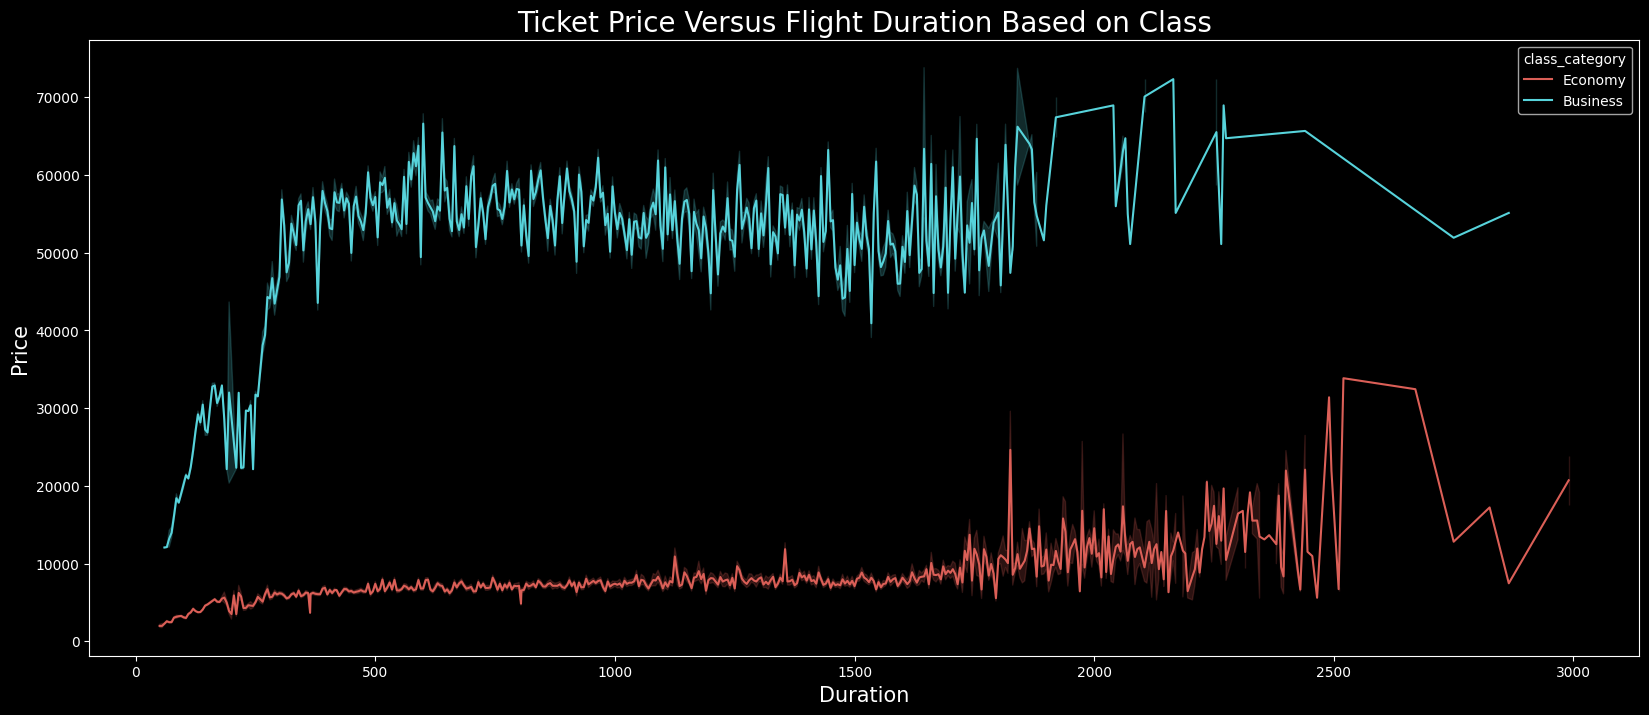

In [97]:
plt.style.use('dark_background')
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='duration_in_min',y='price',hue='class_category',palette='hls')
plt.title('Ticket Price Versus Flight Duration Based on Class',fontsize=20)
plt.xlabel('Duration',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

### With increase in Duration, the Ticket Price is also Increases In both the Economy and Business classes


### How does the price affected on the days left for Departure?



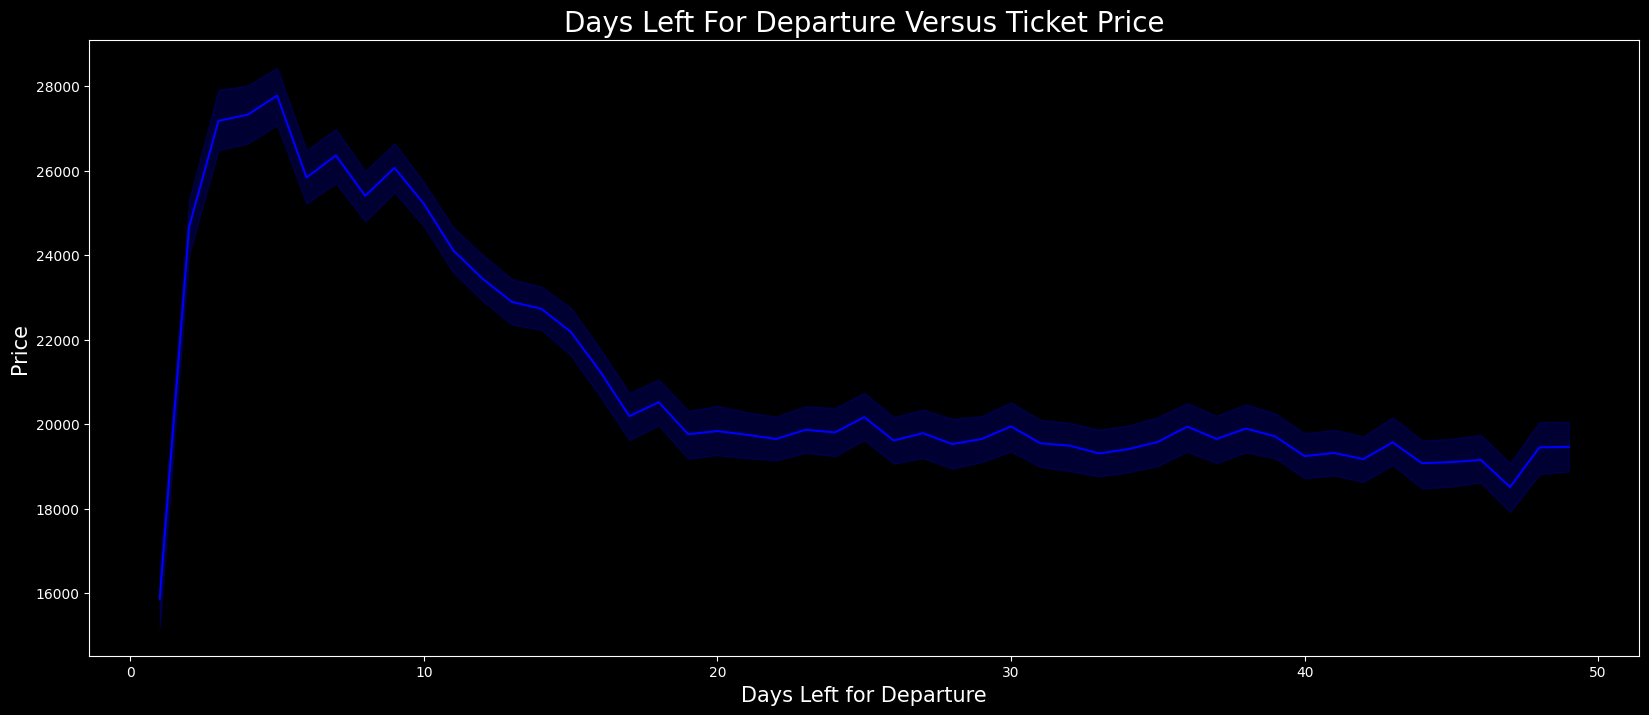

In [98]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='days_left',y='price',color='blue')
plt.title('Days Left For Departure Versus Ticket Price',fontsize=20)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

### As we can see when compared to others when there are less days remaining for departure then the Ticket Price is very High for all airlines


In [99]:
df.sample(10)

,airline,from,to,class_category,day,month,route,dep_hour,arr_hour,dep_period,arr_period,airline_index,route_index,duration_in_min,stops_category,arr_daytime_category,dep_daytime_category,month_category,days_left,price
111303,Vistara,Bangalore,Hyderabad,Economy,26.0,2.0,Bangalore-Hyderabad,21.0,7,Night,Morning,7.0,2.0,610.0,1-Stop,Daytime Arrival,Night Departure,February,16.0,4628
266011,Air India,Kolkata,Mumbai,Business,11.0,3.0,Kolkata-Mumbai,20.0,18,Night,Afternoon,0.0,24.0,1290.0,1-Stop,Daytime Arrival,Night Departure,March,30.0,50271
272200,Air India,Kolkata,Hyderabad,Business,21.0,3.0,Kolkata-Hyderabad,10.0,21,Morning,Night,0.0,23.0,670.0,1-Stop,Night Arrival,Daytime Departure,March,41.0,67441
97176,Air India,Bangalore,Mumbai,Economy,1.0,3.0,Bangalore-Mumbai,19.0,16,Night,Afternoon,0.0,4.0,1295.0,1-Stop,Daytime Arrival,Night Departure,March,19.0,6901
231377,Vistara,Mumbai,Bangalore,Business,26.0,2.0,Mumbai-Bangalore,8.0,22,Morning,Night,7.0,25.0,835.0,1-Stop,Night Arrival,Daytime Departure,February,17.0,69168
231887,Vistara,Mumbai,Bangalore,Business,4.0,3.0,Mumbai-Bangalore,6.0,20,Early_morning,Night,7.0,25.0,835.0,1-Stop,Night Arrival,Daytime Departure,March,23.0,62448
138266,Vistara,Kolkata,Bangalore,Economy,3.0,3.0,Kolkata-Bangalore,17.0,10,Afternoon,Morning,7.0,20.0,1030.0,1-Stop,Daytime Arrival,Daytime Departure,March,21.0,6195
30094,Indigo,Delhi,Hyderabad,Economy,23.0,2.0,Delhi-Hyderabad,19.0,21,Night,Night,3,12.0,140.0,Non-stop,Night Arrival,Night Departure,February,13.0,5955
73951,Vistara,Mumbai,Hyderabad,Economy,9.0,3.0,Mumbai-Hyderabad,18.0,19,Afternoon,Night,7.0,28.0,1525.0,1-Stop,Night Arrival,Daytime Departure,March,27.0,4149
150015,Vistara,Kolkata,Chennai,Economy,4.0,3.0,Kolkata-Chennai,15.0,9,Afternoon,Morning,7.0,21.0,1115.0,1-Stop,Daytime Arrival,Daytime Departure,March,23.0,11876


## Label Encoding

###  Label encoding for airline class.

In [100]:
df['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO FIRST', 'Indigo',
       'Air India', 'Trujet', 'StarAir'], dtype=object)

In [101]:
from sklearn.preprocessing import LabelEncoder

# create an encoder
encoder = LabelEncoder()

# fit all the values which need to be translated
df['airline'] = encoder.fit_transform(df['airline'] )

In [102]:
df.sample(10)

,airline,from,to,class_category,day,month,route,dep_hour,arr_hour,dep_period,arr_period,airline_index,route_index,duration_in_min,stops_category,arr_daytime_category,dep_daytime_category,month_category,days_left,price
12484,7,Delhi,Bangalore,Economy,24.0,2.0,Delhi-Bangalore,7.0,20,Morning,Night,7,10.0,805.0,1-Stop,Night Arrival,Daytime Departure,February,14.0,13314
98273,7,Bangalore,Mumbai,Economy,7.0,3.0,Bangalore-Mumbai,8.0,17,Morning,Afternoon,7.0,4.0,580.0,1-Stop,Daytime Arrival,Daytime Departure,March,25.0,6568
42114,4,Delhi,Chennai,Economy,26.0,3.0,Delhi-Chennai,18.0,21,Afternoon,Night,4.0,11.0,170.0,Non-stop,Night Arrival,Daytime Departure,March,44.0,2637
29018,0,Delhi,Hyderabad,Economy,14.0,2.0,Delhi-Hyderabad,8.0,10,Morning,Morning,0,12.0,140.0,Non-stop,Daytime Arrival,Daytime Departure,February,4.0,5955
269947,7,Kolkata,Bangalore,Business,25.0,3.0,Kolkata-Bangalore,17.0,22,Afternoon,Night,7.0,20.0,315.0,1-Stop,Night Arrival,Daytime Departure,March,44.0,52287
146596,3,Kolkata,Hyderabad,Economy,19.0,3.0,Kolkata-Hyderabad,23.0,1,Night,Early_morning,3.0,23.0,130.0,Non-stop,Night Arrival,Night Departure,March,37.0,2750
215161,7,Delhi,Bangalore,Business,21.0,3.0,Delhi-Bangalore,9.0,17,Morning,Afternoon,7.0,10.0,495.0,1-Stop,Daytime Arrival,Daytime Departure,March,40.0,49177
109805,4,Bangalore,Hyderabad,Economy,13.0,2.0,Bangalore-Hyderabad,17.0,18,Afternoon,Afternoon,4.0,2.0,65.0,Non-stop,Daytime Arrival,Daytime Departure,February,3.0,4338
107156,7,Bangalore,Kolkata,Economy,14.0,3.0,Bangalore-Kolkata,11.0,22,Morning,Night,7.0,3.0,675.0,1-Stop,Night Arrival,Daytime Departure,March,32.0,8112
27971,0,Delhi,Kolkata,Economy,27.0,3.0,Delhi-Kolkata,16.0,19,Afternoon,Night,0,13.0,1630.0,1-Stop,Night Arrival,Daytime Departure,March,45.0,4559


In [103]:
encoder.classes_

array(['Air India', 'AirAsia', 'GO FIRST', 'Indigo', 'SpiceJet',
       'StarAir', 'Trujet', 'Vistara'], dtype=object)

### Label encoding for source city column.

In [104]:
from sklearn.preprocessing import LabelEncoder

# create an encoder
encoder = LabelEncoder()

# fit all the values which need to be translated
df['from'] = encoder.fit_transform(df['from'] )

In [105]:
encoder.classes_

array(['Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai'],
      dtype=object)

In [106]:
df.sample(10)

,airline,from,to,class_category,day,month,route,dep_hour,arr_hour,dep_period,arr_period,airline_index,route_index,duration_in_min,stops_category,arr_daytime_category,dep_daytime_category,month_category,days_left,price
181143,7,1,Delhi,Economy,17.0,2.0,Chennai-Delhi,7.0,14,Morning,Afternoon,7.0,6.0,425.0,1-Stop,Daytime Arrival,Daytime Departure,February,8.0,11553
183892,1,1,Delhi,Economy,8.0,3.0,Chennai-Delhi,22.0,8,Night,Morning,1.0,6.0,655.0,1-Stop,Daytime Arrival,Night Departure,March,26.0,3093
134201,7,4,Mumbai,Economy,23.0,3.0,Kolkata-Mumbai,20.0,12,Night,Morning,7.0,24.0,970.0,1-Stop,Daytime Arrival,Night Departure,March,41.0,6067
80345,3,5,Chennai,Economy,5.0,3.0,Mumbai-Chennai,16.0,21,Afternoon,Night,3.0,26.0,285.0,1-Stop,Night Arrival,Daytime Departure,March,23.0,6556
191650,7,1,Mumbai,Economy,14.0,3.0,Chennai-Mumbai,17.0,23,Afternoon,Night,7.0,9.0,400.0,1-Stop,Night Arrival,Daytime Departure,March,33.0,4452
194714,7,1,Bangalore,Economy,23.0,2.0,Chennai-Bangalore,12.0,22,Morning,Night,7.0,5.0,620.0,1-Stop,Night Arrival,Daytime Departure,February,14.0,9105
293287,7,1,Mumbai,Business,27.0,3.0,Chennai-Mumbai,21.0,11,Night,Morning,7.0,9.0,845.0,1-Stop,Daytime Arrival,Night Departure,March,47.0,64113
215214,0,2,Bangalore,Business,22.0,3.0,Delhi-Bangalore,9.0,12,Morning,Morning,0.0,10.0,165.0,Non-stop,Daytime Arrival,Daytime Departure,March,41.0,32859
3575,0,2,Mumbai,Economy,1.0,3.0,Delhi-Mumbai,10.0,16,Morning,Afternoon,0,14.0,340.0,1-Stop,Daytime Arrival,Daytime Departure,March,20.0,13463
143165,7,4,Hyderabad,Economy,17.0,2.0,Kolkata-Hyderabad,10.0,20,Morning,Night,7.0,23.0,640.0,1-Stop,Night Arrival,Daytime Departure,February,8.0,18505


### Label encoding for Departure time column.

In [107]:
df["dep_period"].value_counts()

Morning          109550
Afternoon         78249
Night             65521
Early_morning     37770
Name: dep_period, dtype: int64

In [108]:
from sklearn.preprocessing import LabelEncoder

# create an encoder
encoder = LabelEncoder()

# fit all the values which need to be translated
df['dep_period'] = encoder.fit_transform(df['dep_period'])

In [109]:
encoder.classes_

array(['Afternoon', 'Early_morning', 'Morning', 'Night'], dtype=object)

In [110]:
df.sample(10)

,airline,from,to,class_category,day,month,route,dep_hour,arr_hour,dep_period,arr_period,airline_index,route_index,duration_in_min,stops_category,arr_daytime_category,dep_daytime_category,month_category,days_left,price
183791,7,1,Delhi,Economy,7.0,3.0,Chennai-Delhi,12.0,0,2,Early_morning,7.0,6.0,745.0,1-Stop,Night Arrival,Daytime Departure,March,26.0,4971
151253,3,4,Chennai,Economy,17.0,3.0,Kolkata-Chennai,13.0,22,0,Night,3.0,21.0,490.0,1-Stop,Night Arrival,Daytime Departure,March,35.0,3918
19960,3,2,Bangalore,Economy,31.0,3.0,Delhi-Bangalore,10.0,16,2,Afternoon,3,10.0,375.0,1-Stop,Daytime Arrival,Daytime Departure,March,49.0,4007
101358,3,0,Mumbai,Economy,24.0,3.0,Bangalore-Mumbai,14.0,20,0,Night,3.0,4.0,355.0,1-Stop,Night Arrival,Daytime Departure,March,42.0,3012
2570,4,2,Mumbai,Economy,25.0,2.0,Delhi-Mumbai,15.0,17,0,Afternoon,4,14.0,1545.0,1-Stop,Daytime Arrival,Daytime Departure,February,15.0,3519
188239,7,1,Mumbai,Economy,17.0,2.0,Chennai-Mumbai,21.0,11,3,Morning,7.0,9.0,870.0,1-Stop,Daytime Arrival,Night Departure,February,8.0,11069
269439,0,4,Bangalore,Business,16.0,3.0,Kolkata-Bangalore,20.0,16,3,Afternoon,0.0,20.0,1185.0,1-Stop,Daytime Arrival,Night Departure,March,36.0,69938
81894,7,5,Chennai,Economy,16.0,3.0,Mumbai-Chennai,12.0,22,2,Night,7.0,26.0,620.0,1-Stop,Night Arrival,Daytime Departure,March,34.0,4663
266463,7,4,Mumbai,Business,17.0,3.0,Kolkata-Mumbai,15.0,23,0,Night,7.0,24.0,510.0,1-Stop,Night Arrival,Daytime Departure,March,37.0,62591
104554,3,0,Kolkata,Economy,25.0,2.0,Bangalore-Kolkata,19.0,6,3,Early_morning,3.0,3.0,645.0,1-Stop,Daytime Arrival,Night Departure,February,15.0,6638


### Label encoding for Stops column.

In [111]:
from sklearn.preprocessing import LabelEncoder

# create an encoder
encoder = LabelEncoder()

# fit all the values which need to be translated
df['stops_category'] = encoder.fit_transform(df['stops_category'])

In [112]:
encoder.classes_

array(['1-Stop', 'Multiple-Stops', 'Non-stop'], dtype=object)

### Label encoding for Arrival Time column.

In [113]:
from sklearn.preprocessing import LabelEncoder

# create an encoder
encoder = LabelEncoder()

# fit all the values which need to be translated
df['arr_period'] = encoder.fit_transform(df['arr_period'])

In [114]:
encoder.classes_

array(['Afternoon', 'Early_morning', 'Morning', 'Night'], dtype=object)

### Label encoding for Destination City column.

In [115]:
from sklearn.preprocessing import LabelEncoder

# create an encoder
encoder = LabelEncoder()

# fit all the values which need to be translated
df['to'] = encoder.fit_transform(df['to'])

In [116]:
encoder.classes_

array(['Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai'],
      dtype=object)

### Label encoding for Class column.

In [117]:
from sklearn.preprocessing import LabelEncoder

# create an encoder
encoder = LabelEncoder()

# fit all the values which need to be translated
df['class_category'] = encoder.fit_transform(df['class_category'])

In [118]:
encoder.classes_

array(['Business', 'Economy'], dtype=object)

### Label Encoding for route column.

In [119]:
from sklearn.preprocessing import LabelEncoder

# create an encoder
encoder = LabelEncoder()

# fit all the values which need to be translated
df['route'] = encoder.fit_transform(df['route'])

In [120]:
encoder.classes_

array(['Bangalore-Chennai', 'Bangalore-Delhi', 'Bangalore-Hyderabad',
       'Bangalore-Kolkata', 'Bangalore-Mumbai', 'Chennai-Bangalore',
       'Chennai-Delhi', 'Chennai-Hyderabad', 'Chennai-Kolkata',
       'Chennai-Mumbai', 'Delhi-Bangalore', 'Delhi-Chennai',
       'Delhi-Hyderabad', 'Delhi-Kolkata', 'Delhi-Mumbai',
       'Hyderabad-Bangalore', 'Hyderabad-Chennai', 'Hyderabad-Delhi',
       'Hyderabad-Kolkata', 'Hyderabad-Mumbai', 'Kolkata-Bangalore',
       'Kolkata-Chennai', 'Kolkata-Delhi', 'Kolkata-Hyderabad',
       'Kolkata-Mumbai', 'Mumbai-Bangalore', 'Mumbai-Chennai',
       'Mumbai-Delhi', 'Mumbai-Hyderabad', 'Mumbai-Kolkata'], dtype=object)

In [121]:
from sklearn.preprocessing import LabelEncoder

# create an encoder
encoder = LabelEncoder()

# fit all the values which need to be translated
df['arr_daytime_category'] = encoder.fit_transform(df['arr_daytime_category'])

In [122]:
encoder.classes_

array(['Daytime Arrival', 'Night Arrival'], dtype=object)

In [123]:
from sklearn.preprocessing import LabelEncoder

# create an encoder
encoder = LabelEncoder()

# fit all the values which need to be translated
df['dep_daytime_category'] = encoder.fit_transform(df['dep_daytime_category'])

In [124]:
encoder.classes_

array(['Daytime Departure', 'Night Departure'], dtype=object)

In [125]:
from sklearn.preprocessing import LabelEncoder

# create an encoder
encoder = LabelEncoder()

# fit all the values which need to be translated
df['month_category'] = encoder.fit_transform(df['month_category'])

In [126]:
encoder.classes_

array(['February', 'March'], dtype=object)

In [127]:
df.sample(10)

,airline,from,to,class_category,day,month,route,dep_hour,arr_hour,dep_period,arr_period,airline_index,route_index,duration_in_min,stops_category,arr_daytime_category,dep_daytime_category,month_category,days_left,price
214977,0,2,0,0,19.0,3.0,10,14.0,18,0,0,0.0,10.0,1680.0,0,0,0,1,38.0,42457
142933,3,4,3,1,15.0,2.0,23,15.0,23,0,3,3.0,23.0,535.0,0,1,0,0,6.0,13419
51853,0,5,2,1,27.0,3.0,27,8.0,10,2,2,0.0,27.0,135.0,2,0,0,1,45.0,2464
90349,0,0,2,1,14.0,3.0,1,19.0,9,3,2,0.0,1.0,840.0,0,0,1,1,32.0,4294
25312,7,2,4,1,13.0,3.0,13,20.0,22,3,3,7,13.0,135.0,2,1,1,1,31.0,4000
217717,7,2,4,0,9.0,3.0,13,19.0,9,3,2,7.0,13.0,880.0,0,0,1,1,29.0,75721
228393,7,5,2,0,15.0,3.0,27,7.0,17,2,0,7.0,27.0,645.0,0,0,0,1,34.0,59917
131338,7,4,5,1,7.0,3.0,24,7.0,23,2,3,7.0,24.0,1000.0,0,1,0,1,25.0,6067
165707,3,3,0,1,13.0,2.0,15,9.0,17,2,0,3.0,15.0,460.0,0,0,0,0,4.0,9052
151406,7,4,1,1,18.0,3.0,21,18.0,20,0,3,7.0,21.0,1530.0,0,1,0,1,37.0,6009


### Heatmap of correlation

/tmp/ipykernel_4939/4168668764.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),linewidth=0.5,annot=True)


<Axes: >

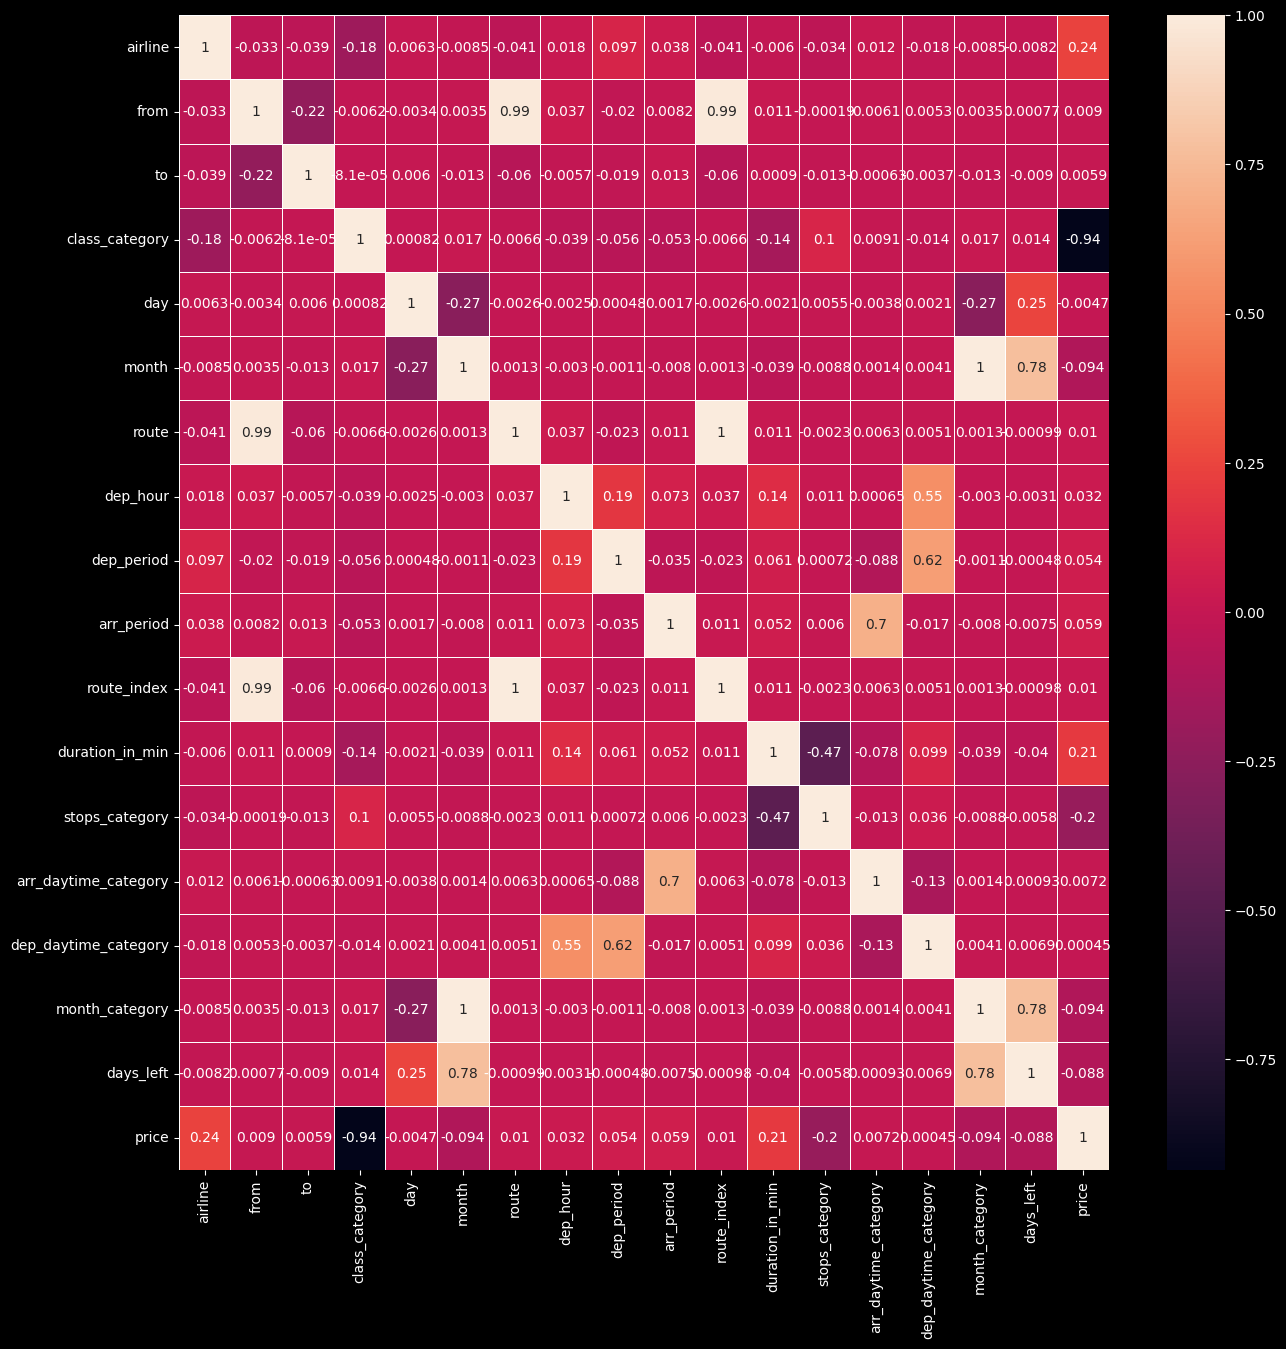

In [128]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(),linewidth=0.5,annot=True)

### Rename column class.

In [129]:
df.rename(columns = {'class_category':'category'}, inplace = True)


In [130]:
df.head(10)

,airline,from,to,category,day,month,route,dep_hour,arr_hour,dep_period,arr_period,airline_index,route_index,duration_in_min,stops_category,arr_daytime_category,dep_daytime_category,month_category,days_left,price
0,4,2,5,1,11.0,2.0,14,18.0,21,0,3,4,14.0,130.0,2,1,0,0,1.0,5953
1,4,2,5,1,11.0,2.0,14,6.0,8,1,2,4,14.0,140.0,2,0,0,0,1.0,5953
2,1,2,5,1,11.0,2.0,14,4.0,6,1,1,1,14.0,130.0,2,0,1,0,1.0,5956
3,7,2,5,1,11.0,2.0,14,10.0,12,2,2,7,14.0,135.0,2,0,0,0,1.0,5955
5,7,2,5,1,11.0,2.0,14,11.0,14,2,0,7,14.0,140.0,2,0,0,0,1.0,5955
6,7,2,5,1,11.0,2.0,14,9.0,11,2,2,7,14.0,125.0,2,0,0,0,1.0,6060
7,7,2,5,1,11.0,2.0,14,14.0,16,0,0,7,14.0,130.0,2,0,0,0,1.0,6060
8,2,2,5,1,11.0,2.0,14,8.0,10,2,2,2,14.0,130.0,2,0,0,0,1.0,5954
9,2,2,5,1,11.0,2.0,14,14.0,16,0,0,2,14.0,135.0,2,0,0,0,1.0,5954
10,2,2,5,1,11.0,2.0,14,15.0,17,0,0,2,14.0,135.0,2,0,0,0,1.0,5954


In [131]:
df.shape

(291090, 20)

In [132]:
df.dtypes

airline                   int64
from                      int64
to                        int64
category                  int64
day                     float64
month                   float64
route                     int64
dep_hour                float64
arr_hour                 object
dep_period                int64
arr_period                int64
airline_index            object
route_index             float64
duration_in_min         float64
stops_category            int64
arr_daytime_category      int64
dep_daytime_category      int64
month_category            int64
days_left               float64
price                     int64
dtype: object

### Spliting the data

In [133]:
x=df.drop(['price',"airline_index","arr_hour"],axis=1)
y=df['price']

### Feature Selection Using ExtraTreeRegressor

In [134]:
from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(x,y)


ExtraTreesRegressor()

In [135]:
print(selection.feature_importances_)


[0.01118398 0.00379704 0.00731093 0.87568339 0.00877107 0.00367553
 0.00539905 0.0085724  0.00282814 0.00209023 0.00527681 0.01602588
 0.03688656 0.00106193 0.00106522 0.00289768 0.00747416]


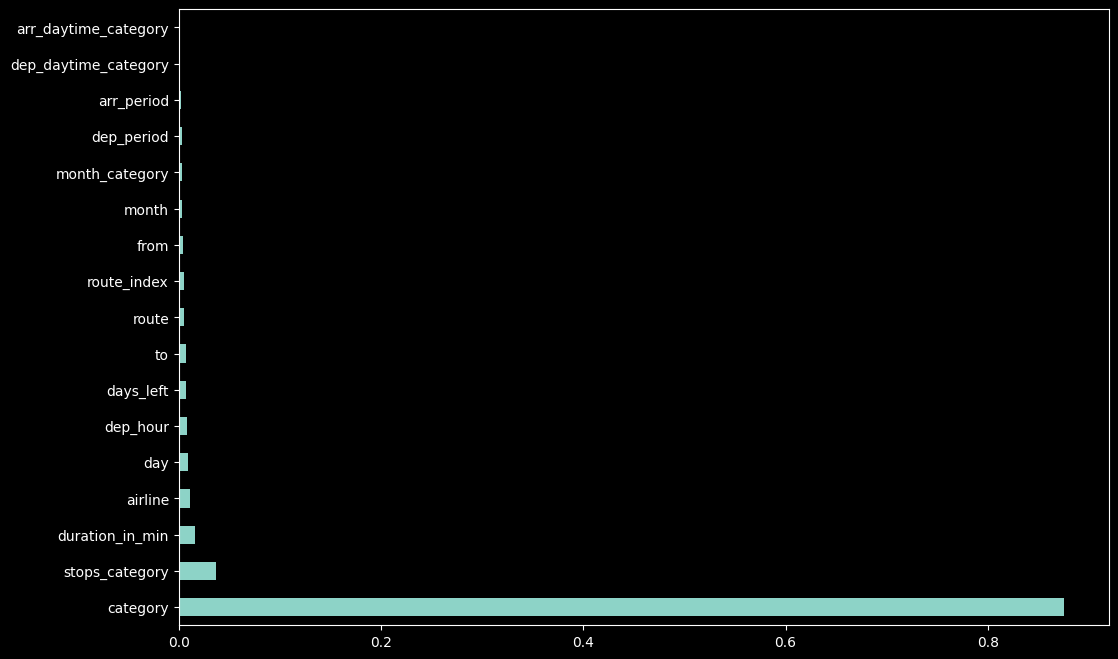

In [136]:
plt.figure(figsize=(12,8))
feat_importances=pd.Series(selection.feature_importances_,index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [137]:
df.shape

(291090, 20)

### Because of low corelation with depedant variable we drop month column and route column.

In [138]:
df = df.drop(['month'], axis = 1)

In [139]:
df = df.drop(['route'], axis= 1)

###  As in our Dataset there is dep_period and arr_period columns which are realted to dep_hour and arr_hour so we drop this columns from our dataset for prediction of model. 

In [140]:
df = df.drop(['dep_hour'], axis = 1)

In [141]:
df = df.drop(['arr_hour'], axis = 1)

### Because of low corelation and on domain knowledge we drop airline index and route index column.

In [142]:
df = df.drop(['airline_index'], axis = 1)

In [143]:
df = df.drop(['route_index'], axis = 1)

In [144]:
df = df.drop(['arr_daytime_category'], axis = 1)

In [145]:
df = df.drop(['dep_daytime_category'], axis = 1)

In [146]:
df.shape

(291090, 12)

In [147]:
x=df.drop(['price'],axis=1)
y=df['price']

In [148]:
from sklearn.model_selection import train_test_split

# split the data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

### Create and Train the model

In [149]:
def create_model_lr():
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    model.fit(x_train, y_train)
    return model

In [150]:
def create_model_knn():
    from sklearn.neighbors import KNeighborsRegressor
    model = KNeighborsRegressor(n_neighbors=4)
    model.fit(x_train, y_train)
    return model

In [151]:
def create_model_gb():
    from sklearn.ensemble import GradientBoostingRegressor
    model = GradientBoostingRegressor(n_estimators=25, max_depth=100)
    model.fit(x_train, y_train)
    return model

In [152]:
def create_model_ada():
    from sklearn.ensemble import AdaBoostRegressor
    model = AdaBoostRegressor()
    model.fit(x_train, y_train)
    return model

In [153]:
def create_model_dt():
    from sklearn.tree import DecisionTreeRegressor
    model = DecisionTreeRegressor(max_depth=20)
    model.fit(x_train, y_train)
    return model

In [154]:
def create_model_rf():
    from sklearn.ensemble import RandomForestRegressor
    model = RandomForestRegressor()
    model.fit(x_train, y_train)
    return model

In [155]:
model_lr = create_model_lr()
model_knn = create_model_knn()
model_gb = create_model_gb()
model_ada = create_model_ada()
model_dt = create_model_dt()
model_rf = create_model_rf()


### model evaluation

In [156]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
def model_evaluation(model_name, model):
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse**0.5
    r2 = r2_score(y_test, y_pred)
    return model_name,mae,mse,rmse,r2

In [157]:
df_model = pd.DataFrame(columns=['model name','mean_abs_err','mean_sq_err','root_mean_abs_err','r2-score'])
model_list = [model_evaluation('lr',model_lr),
              model_evaluation('knn',model_knn),
              model_evaluation('gb',model_gb),
              model_evaluation('ada',model_ada),
              model_evaluation('dt',model_dt),
              model_evaluation('rf',model_rf)
             ]
row = 0
for ele in model_list:
    df_model.loc[row] = ele
    row += 1
df_model

,model name,mean_abs_err,mean_sq_err,root_mean_abs_err,r2-score
0,lr,4678.859815,5.128885e+07,7161.623145,0.901245
1,knn,13351.820146,3.382369e+08,18391.219206,0.348733
2,gb,2236.931401,1.554286e+07,3942.443984,0.970073
3,ada,7863.881568,1.050083e+08,10247.354927,0.797809
4,dt,1363.487922,1.339712e+07,3660.207631,0.974204
5,rf,1160.079467,8.818307e+06,2969.563457,0.983021


### Create Pickle file of models.

In [158]:
import pickle
with open('lr_model.pkl','wb') as file:
    pickle.dump(model_lr,file)

with open('knn_model.pkl','wb') as file:
    pickle.dump(model_knn,file)
      
with open('gb_model.pkl','wb') as file:
    pickle.dump(model_gb,file)
    
with open('ada_model.pkl','wb') as file:
    pickle.dump(model_ada,file)
    
with open('dt_model.pkl','wb') as file:
    pickle.dump(model_dt,file)

with open('rf_model.pkl','wb') as file:
    pickle.dump(model_rf,file)